In [52]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [53]:
#Hitting Data Load
Bat = pd.read_csv('stats.csv')


In [132]:
display(Bat)

,"last_name, first_name",player_id,year,pa,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,pitch_count_fastball,pitch_count_breaking,pitch_count,whiff_percent,swing_percent
0,"Hunter, Torii",116338,2015,567,18.5,6.2,0.304,0.290,28.5,5.0,34.9,98.563404,93.393480,1329,465,2087,23.1,53.4
1,"Ortiz, David",120074,2015,614,15.5,12.5,0.379,0.420,34.8,13.1,49.1,102.851133,96.053058,1425,565,2488,23.2,44.7
2,"Rodriguez, Alex",121347,2015,620,23.4,13.5,0.361,0.368,31.4,10.9,43.9,101.381141,95.014380,1539,615,2503,32.0,43.9
3,"Ramirez, Aramis",133380,2015,516,13.2,6.0,0.309,0.304,33.5,5.6,34.5,97.851256,92.944763,1164,480,1815,17.9,52.9
4,"Beltré, Adrian",134181,2015,619,10.5,6.6,0.337,0.360,35.7,5.5,40.4,99.252697,93.842412,1452,515,2288,16.8,48.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,"Durbin, Caleb",702332,2025,506,9.9,5.9,0.319,0.309,29.6,4.0,26.9,96.100903,92.054255,1054,444,1838,13.0,44.5
1515,"Holliday, Jackson",702616,2025,649,21.6,8.6,0.304,0.313,32.4,7.8,40.8,99.642935,94.030387,1373,486,2450,24.5,47.1
1516,"Meidroth, Chase",805367,2025,505,14.3,8.9,0.294,0.297,26.2,1.6,36.1,97.686781,92.976040,1283,444,2057,13.0,38.6
1517,"Wilson, Jacob",805779,2025,523,7.5,5.2,0.348,0.303,32.2,2.2,24.7,95.136633,91.576810,1076,362,1735,9.6,49.9


In [54]:
#Variable Selection for the Hitter Types
HitterType = Bat[['player_id', 'sweet_spot_percent','barrel_batted_rate','avg_best_speed','avg_hyper_speed']]

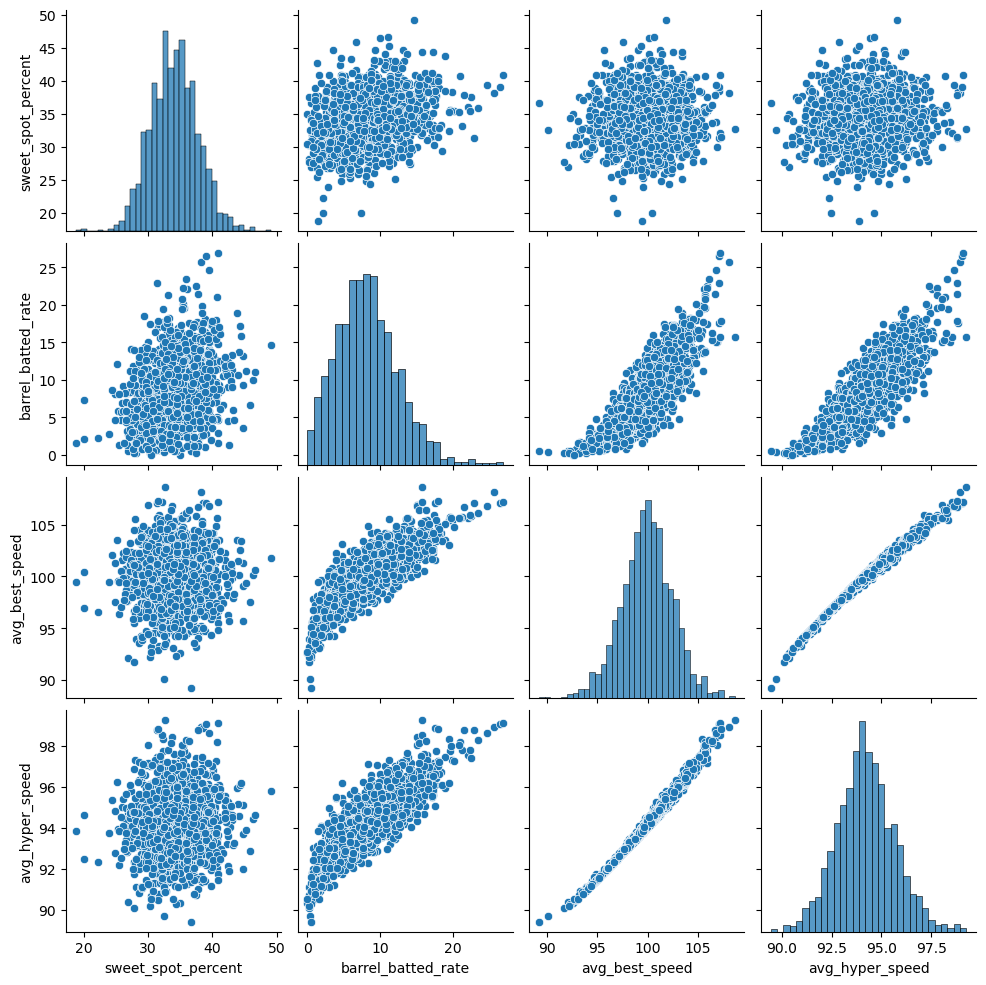

In [55]:
#Plotting the variable relationships to each other
HitterType = Bat[['player_id', 'sweet_spot_percent','barrel_batted_rate','avg_best_speed','avg_hyper_speed']]
sns.pairplot(HitterType.drop(columns=['player_id']))


In [56]:
#Clustering Process Begins
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [57]:
HitterType2 = Bat[['sweet_spot_percent','barrel_batted_rate','avg_best_speed','avg_hyper_speed']].copy()
scaleredUsed = StandardScaler()
ScaledX = scaleredUsed.fit_transform(HitterType2)
kmeansModel = KMeans(n_clusters=3, random_state=42)
predictionClusters = kmeansModel.fit_predict(ScaledX)
HitterType2['Cluster_Group'] = predictionClusters
HitterType2.groupby('Cluster_Group').mean()
clusterNames ={
    0:'Hitters With Good Contact',
    1:'Power Hitters',
    2: 'Balanced Hitters'
}
HitterType2['Hitter_Types'] = HitterType2['Cluster_Group'].map(clusterNames)
print(HitterType2)
 




      sweet_spot_percent  barrel_batted_rate  avg_best_speed  avg_hyper_speed  \
0                   28.5                 5.0       98.563404        93.393480   
1                   34.8                13.1      102.851133        96.053058   
2                   31.4                10.9      101.381141        95.014380   
3                   33.5                 5.6       97.851256        92.944763   
4                   35.7                 5.5       99.252697        93.842412   
...                  ...                 ...             ...              ...   
1514                29.6                 4.0       96.100903        92.054255   
1515                32.4                 7.8       99.642935        94.030387   
1516                26.2                 1.6       97.686781        92.976040   
1517                32.2                 2.2       95.136633        91.576810   
1518                34.1                 3.7       97.154749        92.638544   

      Cluster_Group        

C:\Users\aidhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


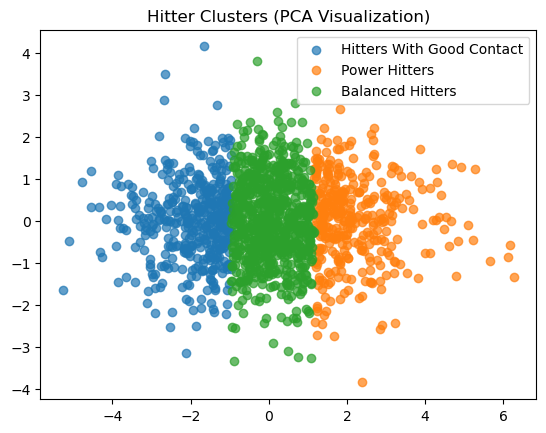

In [58]:
#Visualization

components = PCA(n_components=2)
componentsPlot = components.fit_transform(ScaledX)

for hitter_type in HitterType2['Hitter_Types'].unique():
    points = componentsPlot[HitterType2['Hitter_Types'] == hitter_type]
    plt.scatter(points[:, 0], points[:, 1], alpha=0.7, label=hitter_type)

plt.title("Hitter Clusters (PCA Visualization)")
plt.legend()
plt.show()


In [68]:
print(Bat)

     last_name, first_name  player_id  year   pa  k_percent  bb_percent  \
0            Hunter, Torii     116338  2015  567       18.5         6.2   
1             Ortiz, David     120074  2015  614       15.5        12.5   
2          Rodriguez, Alex     121347  2015  620       23.4        13.5   
3          Ramirez, Aramis     133380  2015  516       13.2         6.0   
4           Beltré, Adrian     134181  2015  619       10.5         6.6   
...                    ...        ...   ...  ...        ...         ...   
1514         Durbin, Caleb     702332  2025  506        9.9         5.9   
1515     Holliday, Jackson     702616  2025  649       21.6         8.6   
1516       Meidroth, Chase     805367  2025  505       14.3         8.9   
1517         Wilson, Jacob     805779  2025  523        7.5         5.2   
1518         Lee, Jung Hoo     808982  2025  617       11.5         7.6   

       woba  xwoba  sweet_spot_percent  barrel_batted_rate  hard_hit_percent  \
0     0.304  0.290 

In [104]:
#Pitching Verus Fastball
HitterType3 = Bat[['woba','xwoba','pitch_count_fastball']].copy()
HitterType3['delta'] = Bat['woba'] - Bat['xwoba']
HitterType3 = HitterType3.drop(columns=['woba'])
scaleredUsed = StandardScaler()
ScaledX = scaleredUsed.fit_transform(HitterType3)
kmeansModel = KMeans(n_clusters=3, random_state=42)
predictionClusters = kmeansModel.fit_predict(ScaledX)
HitterType3['Cluster_Group'] = predictionClusters
HitterType3.groupby('Cluster_Group').mean()
clusterNames ={
    0:'Middle woba positive delta',
    1:'Low woba negative delta',
    2: 'High woba negative delta'
}
HitterType3['Hitter_Types'] = HitterType3['Cluster_Group'].map(clusterNames)
print(HitterType3)





      xwoba  pitch_count_fastball  delta  Cluster_Group  \
0     0.290                  1329  0.014              0   
1     0.420                  1425 -0.041              2   
2     0.368                  1539 -0.007              2   
3     0.304                  1164  0.005              0   
4     0.360                  1452 -0.023              2   
...     ...                   ...    ...            ...   
1514  0.309                  1054  0.010              0   
1515  0.313                  1373 -0.009              1   
1516  0.297                  1283 -0.003              1   
1517  0.303                  1076  0.045              0   
1518  0.319                  1349  0.001              1   

                    Hitter_Types  
0     Middle woba positive delta  
1       High woba negative delta  
2       High woba negative delta  
3     Middle woba positive delta  
4       High woba negative delta  
...                          ...  
1514  Middle woba positive delta  
1515     Lo

C:\Users\aidhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


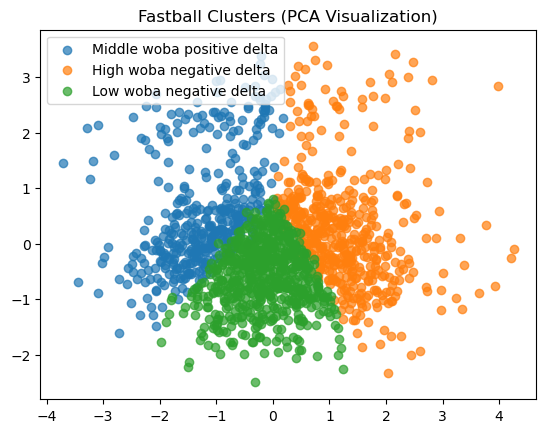

In [106]:
components = PCA(n_components=2)
componentsPlot = components.fit_transform(ScaledX)

for hitter_type in HitterType3['Hitter_Types'].unique():
    points = componentsPlot[HitterType3['Hitter_Types'] == hitter_type]
    plt.scatter(points[:, 0], points[:, 1], alpha=0.7, label=hitter_type)

plt.title("Fastball Clusters (PCA Visualization)")
plt.legend()
plt.show()


In [108]:
HitterType4 = Bat[['woba','xwoba','pitch_count_breaking']].copy()
HitterType4['delta'] = Bat['woba'] - Bat['xwoba']
HitterType4 = HitterType4.drop(columns=['woba'])
scaleredUsed = StandardScaler()
ScaledX = scaleredUsed.fit_transform(HitterType4)
kmeansModel = KMeans(n_clusters=3, random_state=42)
predictionClusters = kmeansModel.fit_predict(ScaledX)
HitterType4['Cluster_Group'] = predictionClusters
HitterType4.groupby('Cluster_Group').mean()
clusterNames ={
    0:'Middle woba positive delta',
    1:'Low woba negative delta',
    2: 'High woba negative delta'
}
HitterType4['Hitter_Types'] = HitterType4['Cluster_Group'].map(clusterNames)
print(HitterType4)



      xwoba  pitch_count_breaking  delta  Cluster_Group  \
0     0.290                   465  0.014              0   
1     0.420                   565 -0.041              1   
2     0.368                   615 -0.007              1   
3     0.304                   480  0.005              0   
4     0.360                   515 -0.023              1   
...     ...                   ...    ...            ...   
1514  0.309                   444  0.010              0   
1515  0.313                   486 -0.009              2   
1516  0.297                   444 -0.003              2   
1517  0.303                   362  0.045              0   
1518  0.319                   513  0.001              0   

                    Hitter_Types  
0     Middle woba positive delta  
1        Low woba negative delta  
2        Low woba negative delta  
3     Middle woba positive delta  
4        Low woba negative delta  
...                          ...  
1514  Middle woba positive delta  
1515    Hig

C:\Users\aidhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


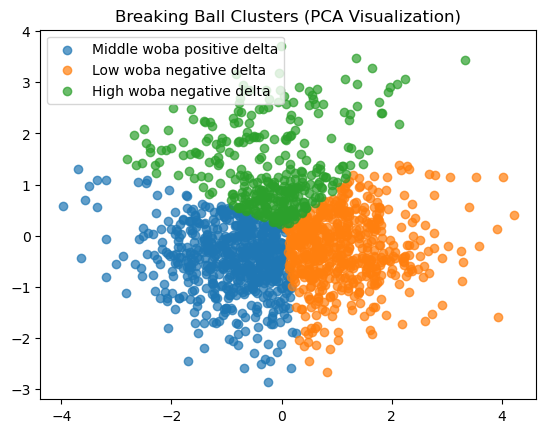

In [110]:
components = PCA(n_components=2)
componentsPlot = components.fit_transform(ScaledX)

for hitter_type in HitterType4['Hitter_Types'].unique():
    points = componentsPlot[HitterType4['Hitter_Types'] == hitter_type]
    plt.scatter(points[:, 0], points[:, 1], alpha=0.7, label=hitter_type)

plt.title("Breaking Ball Clusters (PCA Visualization)")
plt.legend()
plt.show()


In [112]:
print(Bat)

     last_name, first_name  player_id  year   pa  k_percent  bb_percent  \
0            Hunter, Torii     116338  2015  567       18.5         6.2   
1             Ortiz, David     120074  2015  614       15.5        12.5   
2          Rodriguez, Alex     121347  2015  620       23.4        13.5   
3          Ramirez, Aramis     133380  2015  516       13.2         6.0   
4           Beltré, Adrian     134181  2015  619       10.5         6.6   
...                    ...        ...   ...  ...        ...         ...   
1514         Durbin, Caleb     702332  2025  506        9.9         5.9   
1515     Holliday, Jackson     702616  2025  649       21.6         8.6   
1516       Meidroth, Chase     805367  2025  505       14.3         8.9   
1517         Wilson, Jacob     805779  2025  523        7.5         5.2   
1518         Lee, Jung Hoo     808982  2025  617       11.5         7.6   

       woba  xwoba  sweet_spot_percent  barrel_batted_rate  hard_hit_percent  \
0     0.304  0.290 

C:\Users\aidhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


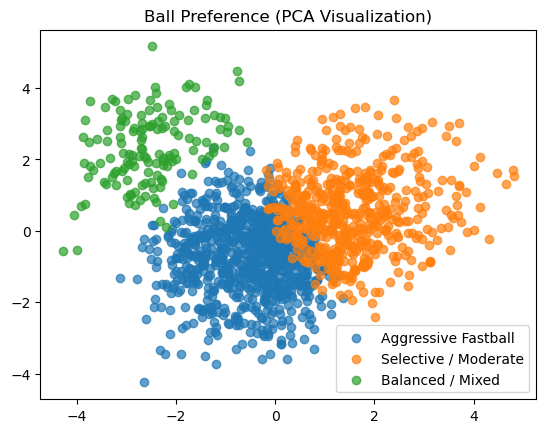

In [134]:
#Swing Preference
clusteringStats = Bat[['pitch_count_fastball','pitch_count_breaking']].copy()
clusteringStats['other'] = Bat['pitch_count'] - Bat['pitch_count_breaking'] - Bat['pitch_count_fastball']
clusteringStats['fast_ball_seen_percentage'] =  Bat['pitch_count_fastball']/Bat['pitch_count']
clusteringStats['breaking_ball_seen_percentage'] =  Bat['pitch_count_breaking']/Bat['pitch_count']
clusteringStats['other pitches percentage'] =  clusteringStats['other']/Bat['pitch_count']
clusteringStats['swing_percent'] = Bat['swing_percent']
scaleredUsed = StandardScaler()
ScaledX = scaleredUsed.fit_transform(clusteringStats)
kmeansModel = KMeans(n_clusters=3, random_state=42)
predictionClusters = kmeansModel.fit_predict(ScaledX)
clusteringStats['Cluster_Group'] = predictionClusters
clusteringStats.groupby('Cluster_Group').mean()

components = PCA(n_components=2)
componentsPlot = components.fit_transform(ScaledX)

clusterNames = {
    0: 'Selective / Moderate',
    1: 'Balanced / Mixed',
    2: 'Aggressive Fastball'
}
clusteringStats['Hitter_Type'] = clusteringStats['Cluster_Group'].map(clusterNames)

for hitter_type in clusteringStats['Hitter_Type'].unique():
    points = componentsPlot[clusteringStats['Hitter_Type'] == hitter_type]
    plt.scatter(points[:, 0], points[:, 1], alpha=0.7, label=hitter_type)

plt.title("Ball Preference (PCA Visualization)")
plt.legend()
plt.show()
